# CODIFICACIÓ - MODULACIÓ
#### Per: David de la Paz Alcantara, Guillem Molina Galera

En aquesta entrega realitzarem pas a pas les tasques requerides per poder codificar i modular una seqüència de caràcters. D'aquesta manera, en cada apartat veurem una de les tasques demanades per l'enunciat, així cm alguns exemples per verificar el seu funcionament. Al final de la pràctica hi haurà un apartat amb tots els passos combinats per tal de poder observar el resultat complert.

In [1]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# List with the letters of the aplhabet
llista_a = ['a','b','c','d','e','f','g','h','i','j','k','l','m',
            'n','o','p','q','r','s','t','u','v','w','x','y','z']

# Codification matrix
Menc = np.array([[6, 24, 1],
                 [13, 16, 10],
                 [20, 17, 15]])

# Decodification matrix
Mdes = np.array([[8, 5, 10],
                 [21, 8, 21],
                 [21, 12, 8]])

## 1. Generació aleatoria de strings
Començem per crear una funció per generar cadenes de text aleatòries. Afegim una opció per crear strings que només continguin lletres i una altra per incloure la resta de signes de puntuació.

In [3]:
# Generate a random string of fixed length, alpha false to include numbers and punctuation marks.
def randomString(stringLength=10,alpha=True):
    letters = string.ascii_lowercase 
    if(not alpha):
        letters += '.,!?¡¿";:^*¬&%$·|\/\\()=[]{}-_' + string.digits + string.ascii_uppercase
    return ''.join(random.choice(letters) for i in range(stringLength))

In [4]:
randomString(40)

'tfctuabiptegyykchhionzkvcovpuwrjdedszgpd'

In [5]:
randomString(40, False)

'Z6WiU\\]XWh?JqUWNk1ACpD%Qo-Db_CnrSuYhYQAu'

## 2. Transformar text a índexos
Creem una funció que transforma cadenes de text a números, assignant a cada lletra el seu índex de la llista_a. Utilitzem la funció lower() per passar-ho tot a minúscules. La resta de caràcters que no pertanyin a la llista mantindràn la seva posició.

In [6]:
# Transform string into a list of indexes
def transforma_text(string):
    text = list(string.lower()) # Transform string into a char list (lowercase)
    for c in text:
        if c in llista_a: # If the char pertains to the alphabet, swap it for its corresponding index
            text[text.index(c)] = llista_a.index(c)
    return text

In [7]:
transforma_text("abchola")

[0, 1, 2, 7, 14, 11, 0]

In [8]:
transforma_text("Hello, World!")

[7, 4, 11, 11, 14, ',', ' ', 22, 14, 17, 11, 3, '!']

## 3. Encriptació de una seqüència
Usem la matriu donada per encriptar una seqüència de caràcters. Degut a la forma de les matrius hem d'encriptar els caràcters de 3 en 3. Suposarem que les frases introduïdes ja tenen un nombre de caràcters múltiple de 3. En cas contrari omplirem la resta amb zeros.

In [9]:
# Encode the list using the matrix
def encripta(idx_list):
    code_list = []
    #counter = 0
    #guardar posicio caracters
    while not(len(idx_list)%3 == 0): # Add zeroes at the end as padding if needed
        idx_list.append(0)
    for i in np.arange(0, len(idx_list), 3): # We encode the numbers in vectors of 3
        # Filter NaNs
        vector = np.array([idx_list[i], idx_list[i+1], idx_list[i+2]])
        aux = (Menc.dot(vector))%26 # Encode vector and transform it to module 26
        code_list += aux.tolist() # Add encoded values to list
    return code_list

In [10]:
test1 = transforma_text("testabcok")
result1 = encripta(test1)
print(result1)

test2 = transforma_text("testabc")
result2 = encripta(test2)
print(result2)

[20, 23, 16, 11, 23, 5, 20, 12, 12]
[20, 23, 16, 11, 23, 5, 12, 0, 14]


## 4. Passar valors a binari
Un cop hem codificat el text amb la matriu, transformem la seqüència a binari(ASCII). Per fer això agafem cada número i passem els seus 2 caràcters a ASCII, per posteriorment convertir aquests valors a binari. Si algun dels nombres només té una xifra, suposem que té un zero a l'esquerra (per tal de que sigui consistent).

In [11]:
# Convert the values to binary(ASCII)
def binarize(code_list):
    binary_list = []
    for i in code_list: # Select each number individually
        aux = str(i).zfill(2) # If number < 10, we add a 0 to its left
        for j in aux:
            binary_list += bin(ord(j))[2:].zfill(8) # Transform each digit to binary(ASCII), and add it to the list
    return binary_list

In [12]:
binlist = binarize(result1)
print(binlist)

['0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0']


## 5. Codificació de la seqüència
Usant els diferents mètodes de codificació vists a teoría, codifiquem una seqüència de caràcters. Programem ara els diferents mètodes per codificar, així com el seu mètode de descodificació (doncs el necessitarem per l'últim apartat).

In [13]:
### CODIFICATION METHODS ###

# NRZ
def encode_NRZ(binary_list):
    return [1 if x != '0' else -1 for x in binary_list]

def decode_NRZ(binary_list):
    return ['1' if x != -1 else '0' for x in binary_list]
    
# NRZ-L
def encode_NRZL(binary_list):
    return [-1 if x != '0' else 1 for x in binary_list]

def decode_NRZL(binary_list):
    return ['0' if x != -1 else '1' for x in binary_list]

# NRZI
def encode_NRZI(binary_list):
    phase = -1
    encoded_list = []
    for i in range(len(binary_list)):
        if binary_list[i] == '1':
            phase *= -1
        encoded_list.append(phase)
    return encoded_list

def decode_NRZI(binary_list):
    binlist = []
    phase = -1
    prev = binary_list[0]
    mode = False
    for i in range(len(binary_list)):
        if (binary_list[i] != prev) and not(mode):
            phase *= -1
            mode = True
        if (binary_list[i] == prev) and mode:
            phase *= -1
            mode = False
        prev = binary_list[i]
        if phase == -1:
            binlist.append('0')
        else:
            binlist.append('1')
    return binlist

# Bipolar-AMI
def encode_AMI(binary_list):
    phase = -1
    encoded_list = []
    for i in range(len(binary_list)):
        if binary_list[i] == '1':
            phase *= -1
            encoded_list.append(phase)
        else:
            encoded_list.append(0)
    return encoded_list

def decode_AMI(binary_list):
    return ['0' if x == 0 else '1' for x in binary_list]

# Pseudoternary
def encode_Pseudo(binary_list):
    phase = -1
    encoded_list = []
    for i in range(len(binary_list)):
        if binary_list[i] == '0':
            phase *= -1
            encoded_list.append(phase)
        else:
            encoded_list.append(0)
    return encoded_list

def decode_Pseudo(binary_list):
    return ['1' if x == 0 else '0' for x in binary_list]

# Manchester
def encode_Manchester(binary_list):
    encoded_list = []
    
    if binary_list[0] == '1':
        encoded_list.append(-1)
    else:
        encoded_list.append(1)
    
    for i in np.arange(2, 2*len(binary_list), 2):
        if binary_list[(i//2)-1] == '1':
            encoded_list.append(1)
        else:
            encoded_list.append(-1)
        if binary_list[i//2] == '1':
            encoded_list.append(-1)
        else:
            encoded_list.append(1)
    
    if binary_list[-1] == '1':
        encoded_list.append(1)
    else:
        encoded_list.append(-1)
    
    return encoded_list

def decode_Manchester(binary_list):
    decoded_list = binary_list[1::2]
    return ['1' if x == 1 else '0' for x in decoded_list]

# Manchester Differential
#def decode_ManDiff(binary_list):
# TODO

# B8ZS
def encode_B8ZS(binary_list):
    phase = -1
    count = 0
    encoded_list = []
    for i in range(len(binary_list)):
        if binary_list[i] == '1':
            phase *= -1
            encoded_list.append(phase)
            count = 0
        else:
            count += 1
            if count < 8:
                encoded_list.append(0)
            else: # If we have 8 zeroes in a row, modify
                encoded_list.append(phase)
                encoded_list[i-4] = phase
                encoded_list[i-3] = -1*phase
                encoded_list[i-1] = -1*phase
                count = 0
    return encoded_list

def decode_B8ZS(binary_list):
    phase = -1
    v = 0
    for i in binary_list:
        if (binary_list[i] != 0):
            if(binary_list[i] != phase):# Code violation
                v += 1
            else:
                phase = binary_list[i]
        if v >= 2: # If we detect 2 code violations, transform to zeroes
            binary_list[i-3] = 0
            binary_list[i-2] = 0
            binary_list[i] = 0
            binary_list[i+1] = 0
            v = 0
            
    return ['0' if x == 0 else '1' for x in binary_list]

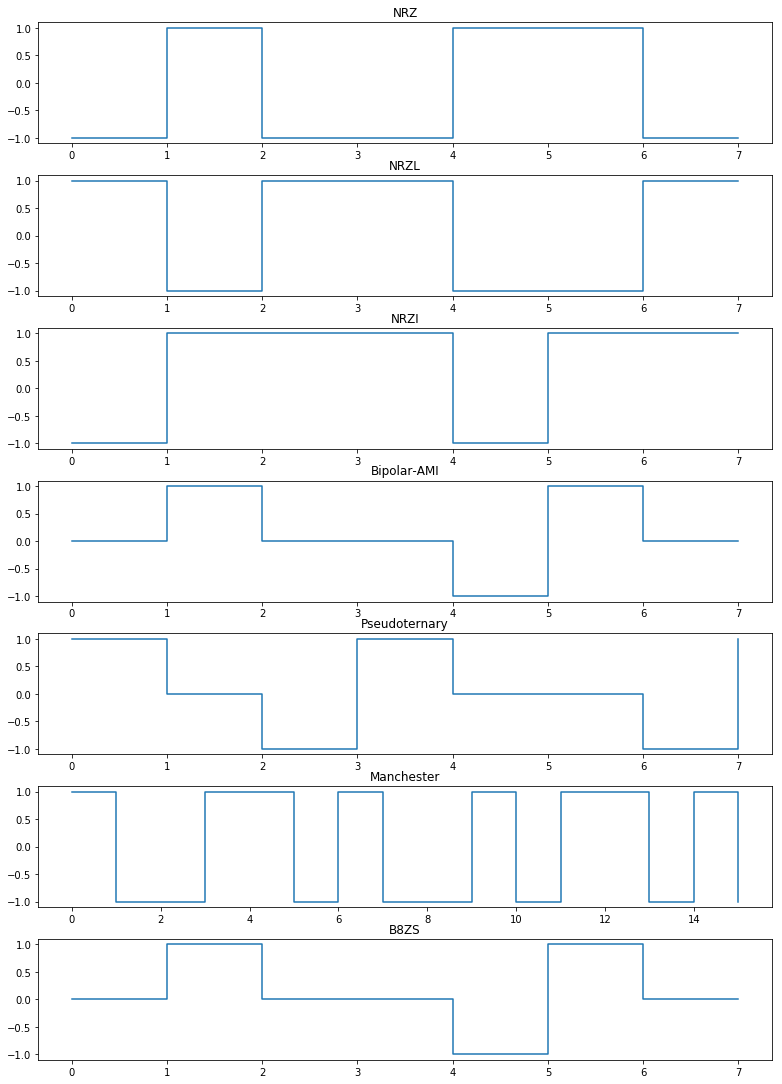

In [14]:
# Codification test
test_bin = ['0', '1', '0', '0', '1', '1', '0', '0']

code_list = [
    encode_NRZ(test_bin.copy()),
    encode_NRZL(test_bin.copy()),
    encode_NRZI(test_bin.copy()),
    encode_AMI(test_bin.copy()),
    encode_Pseudo(test_bin.copy()),
    encode_Manchester(test_bin.copy()),
    encode_B8ZS(test_bin.copy())
]

titles=['NRZ', 'NRZL', 'NRZI', 'Bipolar-AMI', 'Pseudoternary', 'Manchester', 'B8ZS']
fig, axes = plt.subplots(nrows=7,ncols=1, figsize=(11,15))
fig.tight_layout()
ax = axes.flatten()
for i in range(7):
    ax[i].set_title(titles[i])
    if i == 5:
        ax[i].step(range(16), code_list[i], where='post')
    else:
        ax[i].step(range(8), code_list[i], where='post')
plt.show()

## 6. Modulació de la seqüència
Un cop codificada la seqüència, la modulem usant un dels diferents mètodes de modulació.

In [15]:
amplitud = 1
freq =  1
sinusoidal = amplitud*np.cos(np.pi*freq*np.arange(1000)/100)
def sinusoidal(x,amplitud=1, freq=1,steps=100):
    return amplitud*np.cos(2*np.pi*freq*x/steps)

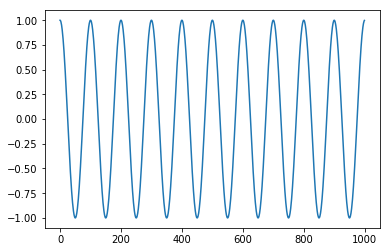

In [16]:
plt.plot(sinusoidal(np.arange(1000)))

In [17]:
def modulate(input_signal,step=500,freq=[1,5], mode='ASK'):
    #asegurem que tenim una numpy.array
    signal = np.array(input_signal)
    #reservem l'espai per la senyal de resposta
    mod_signal = np.zeros(len(signal)*step)
    
    if(mode=='FSK'):#Apliquem FSK
        print('FSK applied')
        for i in range(len(signal)):
            if(signal[i]==1):#Canviem la fase en un grau de pi multiplicant la amplitud per -1.
                mod_signal[i*step:(i+1)*step] = sinusoidal(np.arange(step),amplitud=1,freq=freq[0])
            else:
                mod_signal[i*step:(i+1)*step] = sinusoidal(np.arange(step),amplitud=-1,freq=freq[0])
    elif(mode=='PSK'):#Apliquem PSK
        print('PSK applied')
        for i in range(len(signal)):
            if(signal[i]==1):#Apliquem diferents freqüencies d'ona sinusoidal.
                mod_signal[i*step:(i+1)*step] = sinusoidal(np.arange(step),amplitud=1,freq=freq[0])
            else:
                mod_signal[i*step:(i+1)*step] = sinusoidal(np.arange(step),amplitud=1,freq=freq[1])
    else:#Apliquem ASK
        print('ASK applied')
        for i in range(len(signal)):
            #Ona sinusoidal d'amplitud 0 o 1.
            mod_signal[i*step:(i+1)*step] = sinusoidal(np.arange(step),amplitud=signal[i],freq=freq[0])

    return mod_signal

FSK applied
PSK applied
ASK applied


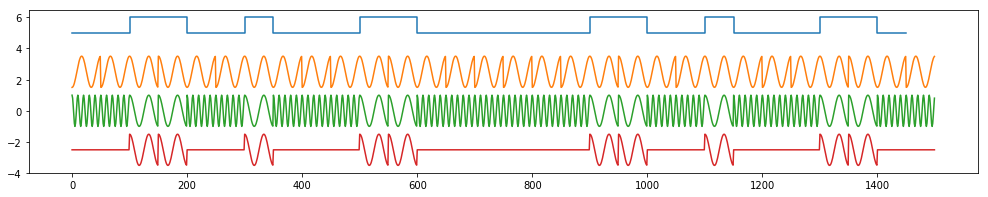

In [18]:
plt.figure(figsize=(17,3))
plt.step(np.arange(len(binlist[0:30]))*50, np.array(binlist).astype(int)[0:30]+5, where='post')
plt.plot(2.5 + modulate(np.array(binlist).astype(int)[0:30],step=50,freq=[3,10],mode='FSK'))
plt.plot(modulate(np.array(binlist).astype(int)[0:30],step=50,freq=[3,10],mode='PSK'))
plt.plot(-2.5 + modulate(np.array(binlist).astype(int)[0:30],step=50,freq=[3,10],mode='ASK'))
plt.show()

In [19]:
def demodulate(input_signal,step=500, mode='ASK',freq=3):
    size = len(input_signal)//step
    demod_signal = np.zeros(size)
    
    if(mode=='PSK'):#Comptem els pics 
        for i in range(size):
            arr = input_signal[i*step:(i+1)*step]
            demod_signal[i] = int(len(arr[arr == 1]) == 1)
    elif(mode=='FSK'):#Mirem si el primer element de l'ona esta invertit o no
        for i in range(size):
            demod_signal[i] = int(input_signal[i*step]==1)
    else:#Sumem el valor absolut de l'ona.
        for i in range(size):
            demod_signal[i] = int( np.abs(input_signal[i*step:(i+1)*step]).sum() > .5)

    return demod_signal

ASK applied


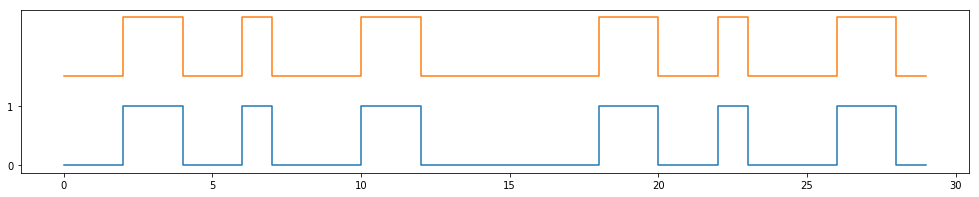

[ 0.  0.  0. ... -0. -0. -0.]


In [20]:
#Exemple de modularització i desmodularització d'una senyal de 30 digits fent servir ASK.
mod_sign = modulate(np.array(binlist).astype(int)[0:30],step=50,freq=[3,6])

plt.figure(figsize=(17,3))
plt.step(np.arange(len(binlist[0:30])),binlist[0:30],where='post')
plt.step(np.arange(len(binlist[0:30])),demodulate(mod_sign,step=50)+1.5,where='post')
plt.show()

print(mod_sign)

PSK applied


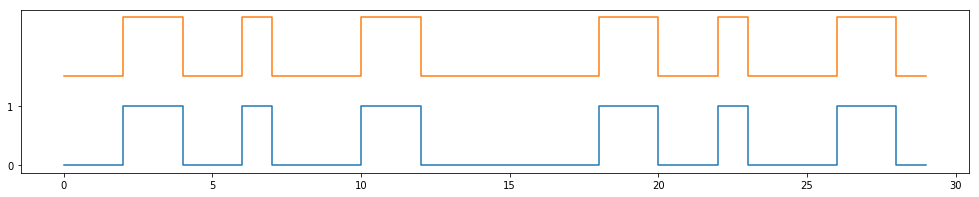

In [21]:
#Exemple de modularització i desmodularització d'una senyal de 30 digits fent servir PSK.
mod_sign = modulate(np.array(binlist).astype(int)[0:30],step=50,freq=[3,10],mode='PSK')

plt.figure(figsize=(17,3))
plt.step(np.arange(len(binlist[0:30])),binlist[0:30], where='post')
plt.step(np.arange(len(binlist[0:30])),demodulate(mod_sign,step=50,mode='PSK')+1.5, where='post')
plt.show()

FSK applied


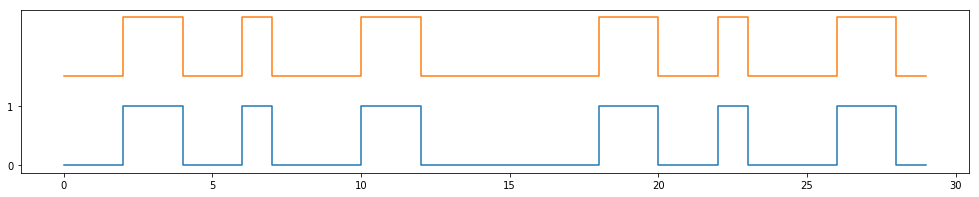

In [22]:
#Exemple de modularització i desmodularització d'una senyal de 30 digits fent servir FSK.
mod_sign = modulate(np.array(binlist).astype(int)[0:30],step=50,freq=[3,6],mode='FSK')

plt.figure(figsize=(17,3))
plt.step(np.arange(len(binlist[0:30])),binlist[0:30], where='post')
plt.step(np.arange(len(binlist[0:30])),demodulate(mod_sign,step=50,mode='FSK')+1.5, where='post')
plt.show()

## 7. Descodificació de la seqüència
Per acabar implementem el codi que falta per acabar de decodificar una seqüència i retornar-la a una cadena de caràcters. Primer de tot fem un mètode per transformar una llista binària a caràcters ASCII i finalment un altre mètode que rebi aquesta llista i utilitzi la matriu restant per decodificar la seqüència i passar-la a text.

In [23]:
# Transform binary list back to encoded list of indexes
def unbinarize(binary_list):
    code_list = []
    for i in np.arange(0, len(binary_list), 16): # Select all bits from list in groups of 16
        aux = ''
        for j in range(2): # For each group of 8 bits
            bit = ''.join(str(e) for e in binary_list[i+8*j:i+8*(j+1)]) # Transform back to digit
            aux += chr(int(bit, 2)) # Write down digit
        code_list.append(int(aux)) # Add number to list
    return code_list

# General decode method, transforms binary list back to text
def desencripta(binary_list):
    code_list = unbinarize(binary_list) # Transform binary list to indexes
    idx_list = []
    for i in np.arange(0, len(code_list), 3): # Decode all indexes of list in vectors of 3
        vector = np.array([code_list[i], code_list[i+1], code_list[i+2]]) # If missing, add zeros!!!
        aux = (Mdes.dot(vector))%26 # Decode vector and transform it to module 26
        idx_list += aux.tolist() # Add decoded values to list
    #print(idx_list)
    # Transform list of indexes back to text
    text = ''
    for i in idx_list:
        text += (llista_a[i])
    return text

## 8. Conclusió
Per acabar combinem tots els passos per tal de veure com es realitzaria una codificació i descodificació d'una seqüència de caràcters.

gyuuiqxyc
[6, 24, 20, 20, 8, 16, 23, 24, 2]
[8, 12, 22, 16, 2, 22, 14, 1, 14]
['0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0']
[-1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -

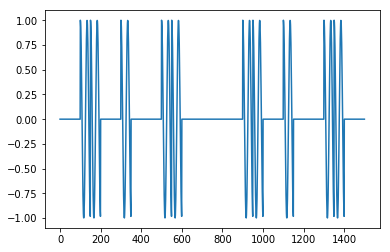

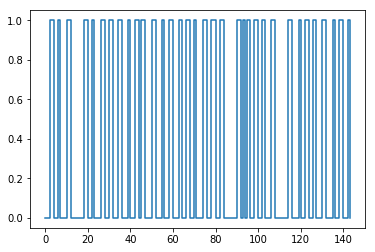

['0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0']
Missatge decodificat:  gyuuiqxyc


In [24]:
#1: Generació aleatoria de text - També es pot introduïr un string manualment
# Nota: Introduir un string no multiple de 3 omplirà els espais restants amb 'a'
text = randomString(9)
print(text)

#2: Transformació a índexos
idx_list = transforma_text(text)
print(idx_list)

#3: Encriptació del text
code_list = encripta(idx_list)
print(code_list)

#4: Pas a binari
bin_list = binarize(code_list)
print(bin_list)

#5: Codificació - Escollir un dels mètodes d'encriptació disponibles:
# NRZ, NRZL, NRZI, AMI, Pseudo, Manchester o B8ZS
encoded_list = encode_NRZI(bin_list)
print(encoded_list)

#6: Modulació - Escollir un dels modes de modulació disponibles:
# FSK, PSK, ASK
mod_sign = modulate(np.array(binlist).astype(int),step=50,freq=[3,10],mode='ASK')
plt.plot(mod_sign[0:30*50])
plt.show()

#7: Desmodulació i descodificació - Utilitzar els mètodes corresponents 
# en funció dels modes de codificació-modulació triats
demod_sign = demodulate(mod_sign,step=50,mode='ASK')
plt.step(range(len(demod_sign)), demod_sign, where='post')
plt.show()
decoded_list = decode_NRZI(encoded_list)
print(decoded_list)
print('Missatge decodificat: ',desencripta(decoded_list))